# **Building a Perceptron Classifier From Scratch**
## *Carter Hanford*
### *October 6, 2020*

<h2> Introduction </h2>

In this python notebook, we'll build a perceptron algorithm from scratch in python and train it on a small, arbitrary dataset with corresponding labels. While [**sklearn**](https://scikit-learn.org/stable/) has a built in *perceptron* function that we can call to use on our data, we'll build on from scratch in this walkthrough because it's always important to see what's going on under the hood of these machine learning algorithms.

The notebook is broken up into three parts;
- ***Part 1*** - *building the perceptron training algorithm*
- ***Part 2*** - *building the perceptron testing algorithm*
- ***Part 3*** - *evalutating the model & checking with sklearn*

In short, *part 1* will build the training model, *part 2* will build the testing model, and *part 3* will evaluate the results.

Let's get started!


---

<h2> Part 1 </h2>


#### **Implementing Perceptron - Perceptron_Train**
As mentioned above, our goal for this notebook and walkthrough is to implement a perceptron from scratch in python. Our program should read a 2-D array of training examples and training labels, and then evaluate performance on separate test examples.

We will need to define two functions to perform Perceptron training (***Perceptron_Train***) and classification (***Perceptron_Test***) on any dataset. The functions should have the following configuration:

First let's start with the ***Perceptron_Train*** function. We will need it to define an input and output as follows:

**Perceptron_Train Inputs**:
- an N x D feature matrix X_train where N is the number of training instances and D is the feature dimension
- an N x 1 label vector y_train for the training instances
- max_iter: the maximum number of passes over the training data (aka epochs)

**Perceptron_Train Outputs**:
- a D x 1 weight vector for D features

**Stop criteria for perceptron learning**:
- Maximum epochs reached
- No errors found

Our goal for the *Perceptron_Train* function is to parse over each data point, attempt to classify the label, and then update the weights and bias if the classification was **wrong**. If the classification was **correct**, then the perceptron keeps moving to the next data point. Finally, we want the algorithm to **stop iterating** when we reach an epoch that gives us 100% correct classification (*zero errors*). 

The image below shows a simple visualization of how a perceptron works.

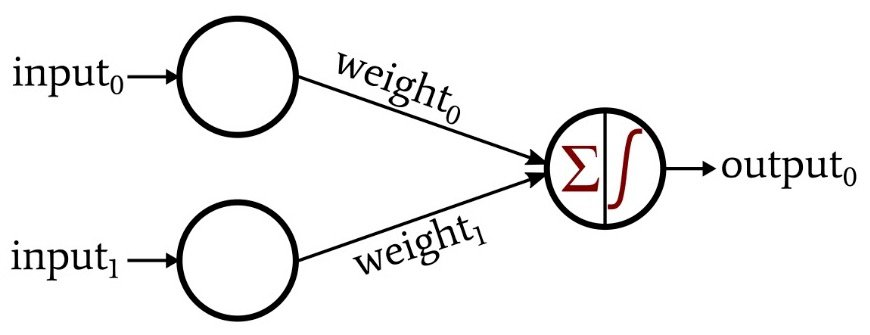


We can build this function below, using a random set of generated data:

In [ ]:
# set x and y 
import numpy as np
X = np.array([[8,8],[0,1],[6,4],[3,3],[4,8],[1,1],[4,6],[2,6]])
y = np.array([1,-1,1,-1,1,-1,1,1])

# set weights
weights = np.array([1,1])
bias = 0

Now that we've generated some training data and corresponding labels, set our weights & bias, we can build the *Perceptron_Train* algorithm to classify the data: 

In [ ]:
# define function 
def Perceptron_Train(X, y, max_iter=100):
  weights = np.array([1, 1])
  bias = 0
  errors = 0
  accuracy_log = []
  for epoch in range(0,max_iter):
    print("Start epoch: ", epoch)
    errors = 0
    accuracy = 0
    for n in range(0, X.shape[0]):
      print("Start data point: ", n)
      feature = X[n]
      y_label = y[n]
      output = np.dot(weights,X[n])+bias
      if y[n] * output <= 0:
        print("Start update weights")
        weights = weights + y_label * feature
        bias = bias + y_label
        errors += 1
      else:
        print("Do nothing")
      print("Latest weights: ", weights, " bias: ", bias, end = "\n\n")
      print("Total Errors after epoch ", epoch, ": ", errors)
    accuracy = 1 - errors/X.shape[0]
    accuracy_log.append(accuracy)
    if errors == 0:
      print("Found classifier with errors: ", errors)
      break

  return weights, bias

As mentioned above the code, we wanted this algorithm to stop at the epoch which returns all the correct labels. So now that we have defined the function to do this, we can set the maximum iterations to 100 (*we won't need this many, but its a safe number*) and the algorithm will stop once we reach 100% classification. 

We also want to know what the best weights and bias were for the perceptron training function so that we can apply those parameters to the test function.

Let's take a look at what happens when we run the algorithm over the training set:

In [ ]:
# set parameters
best_weights, bias = Perceptron_Train(X, y, max_iter=100)

Start epoch:  0
Start data point:  0
Do nothing
Latest weights:  [1 1]  bias:  0

Total Errors after epoch  0 :  0
Start data point:  1
Start update weights
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  2
Do nothing
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  3
Start update weights
Latest weights:  [-2 -3]  bias:  -2

Total Errors after epoch  0 :  2
Start data point:  4
Start update weights
Latest weights:  [2 5]  bias:  -1

Total Errors after epoch  0 :  3
Start data point:  5
Start update weights
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start data point:  6
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start data point:  7
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start epoch:  1
Start data point:  0
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  1 :  0
Start data point:  1
Start 

The algorithm reached 100% classification at **epoch = 36**, in other words, the algorithm looped over the data 36 times until it reached perfect classification for all of the features. 

The generated data is pretty simple, but it seems like our perceptron is performing well. Remember that a perceptron attempts to classify one data point at a time, so the more simple a dataset is, the easier it is for the perceptron to do its job.

---

<h2> Part 2 </h2>

### **Implementing Perceptron - Perceptron_Test**
In part 1, we defined the *Perceptron_Train* function which we used on the data to create a perceptron classifier on the training set. In part 2 we will define the *Perceptron_Test* function, which we can use to predict the labels of the original dataset.

When defining this function, we will need it to output a specific predicted label as follows:

**Perceptron_Test Outputs**:
- an M x 1 predicted label vector y_test for the test instances

Recall that our original labels in the dataset are as follows:
- labels = [1, -1, 1, -1, 1, -1, 1, 1]

We need the *Perceptron_Test* function to correctly predict and classify these labels. Let's define and create that function:

In [ ]:
# define testing algorithm
def Perceptron_Test(w, b, X):
    output_label = []
    for n in range (0, X.shape[0]):
      print("Start data point ", n)
      feature = X[n] 
      output = np.dot(w, X[n])+b
      if output > 0:
        output_label.append(1)
      else: 
        output_label.append(-1)
    return output_label

This algorithm will create an open set *output_label* and append that set with the whatever classification the *Perceptron_Test* algorithm predicts. 

Let's see how well the algorithm performed:

In [ ]:
# set parameters
best_weights, bias = Perceptron_Train(X, y, max_iter=10)

# test the algorithm
Perceptron_Test(best_weights, bias,X)

Start epoch:  0
Start data point:  0
Do nothing
Latest weights:  [1 1]  bias:  0

Total Errors after epoch  0 :  0
Start data point:  1
Start update weights
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  2
Do nothing
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  3
Start update weights
Latest weights:  [-2 -3]  bias:  -2

Total Errors after epoch  0 :  2
Start data point:  4
Start update weights
Latest weights:  [2 5]  bias:  -1

Total Errors after epoch  0 :  3
Start data point:  5
Start update weights
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start data point:  6
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start data point:  7
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  0 :  4
Start epoch:  1
Start data point:  0
Do nothing
Latest weights:  [1 4]  bias:  -2

Total Errors after epoch  1 :  0
Start data point:  1
Start 

[1, -1, 1, 1, 1, -1, 1, 1]

Perfect! Our perceptron has correctly classified all of the features to its labels. This is exactly what we want the perceptron to do, so these results are reassuring!

---

<h2> Part 3 </h2>

### **Model Evaluation & Diagnostics**
In this section, we will answer some questions using the results of the perceptron algorithm in parts 1 & 2. The questions we're interested in are as follows:
1. How many epochs you need from your algorithm in Part I  to get a perfect linearly separable classifier? What’s the final weights in this classifier?
2. What does the linear boundary between the data points and their classification look like?
3. What’s the test accuracy on the following test data using our Perceptron classifier (*Part 1*) derived from training data?
4. What’s the test accuracy on the test data in question 3 using the classifier trained by linear_model.Perceptron in sklearn?

#### **Question 1**
How many epochs you need from your algorithm in Part I to get a perfect linearly separable classifier? What’s the final weights in this classifier?

From our algorithm in Part 1, we need **36 epochs** to reach a perfect linearly separable classifier. In part 1, we reached a classifier with zero errors on the training set at iteration number 36, which in other words means that on the 36th loop around the data, the perceptron correctly classified all labels.

Looking back to the output under part 1(a), we see that once the perceptron became a perfect linear classifier (100% accuracy), the final *weights* were (**-1, 8**) with a *bias* of **-23**.

#### **Question 2**
In this question, we'll visualize the linear boundary and the data points in a scatter plot.

First we will plot the original data points with their corresponding labels. Next, we will create the decision boundary based on calculations provided in the paper. Finally, we will add the decision boundary line to the plot indicating that the perceptron can be perfectly linearly separable. 

(-0.4, 8.4)

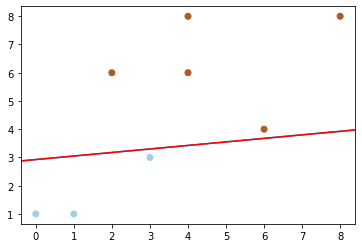

In [ ]:
import matplotlib.pyplot as plt

# set data
X = np.array([[8,8],[0,1],[6,4],[3,3],[4,8],[1,1],[4,6],[2,6]])
y = np.array([1,-1,1,-1,1,-1,1,1])

# create scatter plot with classification
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# set slope and intercept based on calculations
slope = 0.125
c = 2.875

# create decision boundary line
x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])

# plot decision boundary
x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], color = 'r')
ax.set_xlim([x_min, x_max])

#### **Question 3**
Question 4 asks us to generate new data and classify it using our Perceptron classifier that we made in part 1.

We can start by generating the data for this question:

In [ ]:
# set x and y 
import numpy as np
X_new = np.array([[8,1],[0,1],[6,5],[3,2],[4,2],[1,1],[4,7],[2,6]])
y_new = np.array([1,-1,1,-1,1,-1,1,1])

# set weights
weights = np.array([1,1])
bias = 0

Now that we have our data, we can simply copy/paste our *Perceptron_Train* and *Perceptron_Test* algorithms from part 1.

In [ ]:
# set parameters for training set
best_weights, bias = Perceptron_Train(X_new, y_new, max_iter=100)

Start epoch:  0
Start data point:  0
Do nothing
Latest weights:  [1 1]  bias:  0

Total Errors after epoch  0 :  0
Start data point:  1
Start update weights
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  2
Do nothing
Latest weights:  [1 0]  bias:  -1

Total Errors after epoch  0 :  1
Start data point:  3
Start update weights
Latest weights:  [-2 -2]  bias:  -2

Total Errors after epoch  0 :  2
Start data point:  4
Start update weights
Latest weights:  [2 0]  bias:  -1

Total Errors after epoch  0 :  3
Start data point:  5
Start update weights
Latest weights:  [ 1 -1]  bias:  -2

Total Errors after epoch  0 :  4
Start data point:  6
Start update weights
Latest weights:  [5 6]  bias:  -1

Total Errors after epoch  0 :  5
Start data point:  7
Do nothing
Latest weights:  [5 6]  bias:  -1

Total Errors after epoch  0 :  5
Start epoch:  1
Start data point:  0
Do nothing
Latest weights:  [5 6]  bias:  -1

Total Errors after epoch  1 :  0
Start data poin

Now that we ran the *Perceptron_train* function on the new training data, let's run the *Perceptron_test* function and see how well it can predict the labels:

In [ ]:
# perceptron test on labels
predicted_labels = Perceptron_Test(best_weights, bias, X_new)
print("Predicted labels: ", predicted_labels)

Start data point  0
Start data point  1
Start data point  2
Start data point  3
Start data point  4
Start data point  5
Start data point  6
Start data point  7
Predicted labels:  [1, -1, 1, -1, 1, -1, 1, 1]


This function was able to successfully classify 100% of the features, generating a test score of **100%**. This classification score was different from the one I got by hand on the scanned file, but remember I only did one epoch by hand while the *Perceptron_test* does 100 max iterations.

#### **Question 4**
Question 5 asks us compare the accuracy we get using the classifier trained by linear_model.Perceptron in sklearn to the accuracy we get from question 4.

First let's load up the perceptron module from sklearn and run the function.

In [ ]:
# sklearn perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_new, y_new)
perceptron_score = perceptron.score(X_new, y_new)
print("Classification Accuracy using sklearn Perceptron: ", perceptron_score)

Classification Accuracy using sklearn Perceptron:  0.75


According to the classification score on the test data, over 100 iterations sklearn's perceptron gives us a score of 75%, which is much lower than our hand-built perceptron model in part 1.